In [5]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(1)
import matplotlib.pyplot as plt
import seaborn as sns
from cyclepred.t2e import t2e
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
palette=sns.color_palette("RdBu_r", 50)
import pickle
import random
import warnings
warnings.filterwarnings("ignore")
import os
import os.path, time
plt.style.use('seaborn-muted')
%matplotlib inline
%load_ext autoreload
%autoreload 2
import h5py
pd.set_option('display.max_rows', None)
range_dict = {
    'a': range(2,8,1),
    'b': range(2,22,2),
    'c': range(2,12,2),
    'd': range(2,22,2),
    'a_complete': range(2,8,1),
    'b_complete': range(2,22,2),
    'c_complete': range(2,12,2),
    'd_complete': range(2,22,2),
    'a_reduced': range(2,8,1),
    'b_reduced': range(2,22,2),
    'c_reduced': range(2,12,2),
    'd_reduced': range(2,22,2),

}

maes_path = "output/maes/baseline/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
## Evaluate baseline results and save to pickle file

path_baseline_results = '../Tax_paper/code/output_files/results/'

a_complete = os.path.join(path_baseline_results,'suffix_and_remaining_time_helpdesk.csv')
b_complete = os.path.join(path_baseline_results,'suffix_and_remaining_time_bpi_12_w.csv')
c_complete = os.path.join(path_baseline_results,'suffix_and_remaining_time_bpi_12_w_no_repeat.csv')
d_complete = os.path.join(path_baseline_results,'suffix_and_remaining_time_env_permit.csv')

a_complete = pd.read_csv(a_complete)
b_complete = pd.read_csv(b_complete)
c_complete = pd.read_csv(c_complete)
d_complete = pd.read_csv(d_complete)

a_reduced = os.path.join(path_baseline_results,'suffix_and_remaining_time_helpdesk_reduced.csv')
b_reduced = os.path.join(path_baseline_results,'suffix_and_remaining_time_bpi_12_w_reduced.csv')
c_reduced = os.path.join(path_baseline_results,'suffix_and_remaining_time_bpi_12_w_no_repeat_reduced.csv')
d_reduced = os.path.join(path_baseline_results,'suffix_and_remaining_time_env_permit_reduced.csv')

for file in [a_reduced, b_reduced,c_reduced,d_reduced]:
    print("Last modified: %s" % time.ctime(os.path.getmtime(file)))

a_reduced = pd.read_csv(a_reduced)
b_reduced = pd.read_csv(b_reduced)
c_reduced = pd.read_csv(c_reduced)
d_reduced = pd.read_csv(d_reduced)


df_dict = {
    'a_complete': a_complete,
    'b_complete': b_complete,
    'c_complete': c_complete,
    'd_complete': d_complete,
    'a_reduced': a_reduced,
    'b_reduced': b_reduced,
    'c_reduced': c_reduced,
    'd_reduced': d_reduced
}

for dataset in df_dict.keys():
    tmp = df_dict[dataset].groupby(["Prefix length"]).apply(lambda x:mean_absolute_error(x['Ground truth times'], x['Predicted times'])/86400).to_dict()
    tmp = {k:v for k,v in tmp.items() if k in list(range_dict[dataset])}
    pickle.dump(list(tmp.values()), open(maes_path + dataset +'.pkl', "wb"))

Last modified: Tue Jun  9 10:51:33 2020
Last modified: Tue Jun  9 14:23:46 2020
Last modified: Tue Jun  9 14:24:17 2020
Last modified: Tue Jun  9 16:09:00 2020


In [7]:
# colors = ['#0FC373','#FAD22D','#FF8C0A','#FF3232','#181818','#0082F0','#AF78D2','#767676', '#A0A0A0', '#E0E0E0']
# # colors = ['#767676' ,'#A0A0A0','#0099A0','#00CCA0', '#00FFA0']

# def draw_palette():
#     plt.figure(figsize=(4,2));
#     sns.countplot( x=np.arange(len(colors)), palette=colors);
#     plt.show();
# draw_palette()

In [8]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [11]:
train_time = {
    'baseline':{
        'a':2462.0/60,
        'b':12638.0/60,
        'c':4140.0/60,
        'd':8209.0/60
    },
#     'regression':{
#         dataset:pickle.load(open('output/maes/regression/0/' +'regression_'+dataset+'_reduced.pkl', 'rb'))['fit_time'].sum()/60.0 for dataset in ['a','b','c','d']
#     },
    't2e':{
        dataset:pickle.load(open('output/maes/t2e/0/' +'t2e_'+dataset+'_reduced.pkl', 'rb'))['fit_time'].sum()/60.0 for dataset in ['a','b','c','d']
    }
}

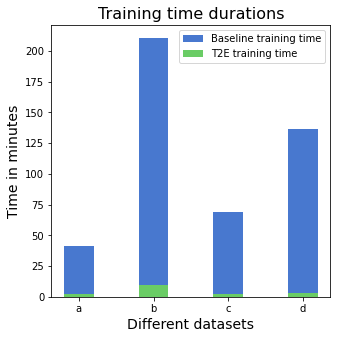

In [12]:
plt.figure(figsize=(5,5));
plt.bar(train_time['baseline'].keys(),train_time['baseline'].values(), label='Baseline training time', width=0.4 );
plt.bar(train_time['t2e'].keys(),train_time['t2e'].values(), label='T2E training time', width=0.4);
plt.ylabel("Time in minutes", fontsize=14);
plt.xlabel("Different datasets", fontsize=14);
plt.title('Training time durations', fontsize=16);
# plt.bar(train_time['regression'].keys(),train_time['regression'].values(), label='Regression training time',color='k')
# plt.yscale('log')
plt.legend();

<class 'seaborn.axisgrid.FacetGrid'>


<Figure size 864x432 with 0 Axes>

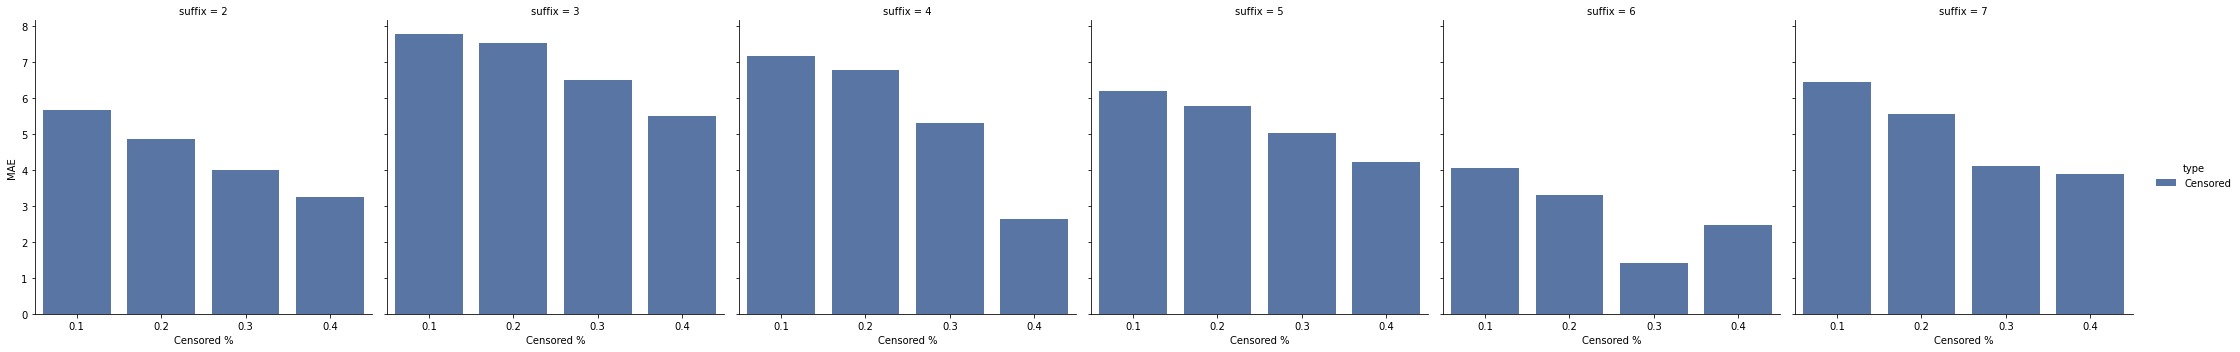

a 1.4015946502057615


In [5]:
result_dict = {}
plt.style.use('seaborn-deep')
path = 'output/maes/t2e_transform/'

for data in ['a']:
    dataset_censored = pd.DataFrame()
    for folder in ["10","20","30","40","50","60","70","80","90"]:

        dataset_censored = dataset_censored.append(pickle.load(open(path + folder + '/t2e_'+data+'_censored.pkl','rb')),ignore_index=True)
        
    dataset_censored['type'] = 'Censored'
    dataset = dataset_censored.copy()
    dataset["Censored %"] = np.round(dataset["Censored %"],decimals=1)

    dataset = dataset.sort_values(['prefix','Censored %','type','MAE'])\
                                .drop_duplicates(subset=['prefix','Censored %','type'], keep='first')\
                                .reset_index(drop=True)
    
    mode = dataset['Censored %'].value_counts().mode()[0]
    dataset = dataset = dataset[dataset.groupby("Censored %")["Censored %"].transform('size') == mode]
    result_dict[data] = dataset
    
    plt.figure(figsize=(12,6));
    g = sns.catplot(data=dataset, x='Censored %', y ='MAE', hue='type', col='prefix', kind='bar');
    
    print(type(g))
    
    plt.show();
    print(data, dataset['MAE'].min())

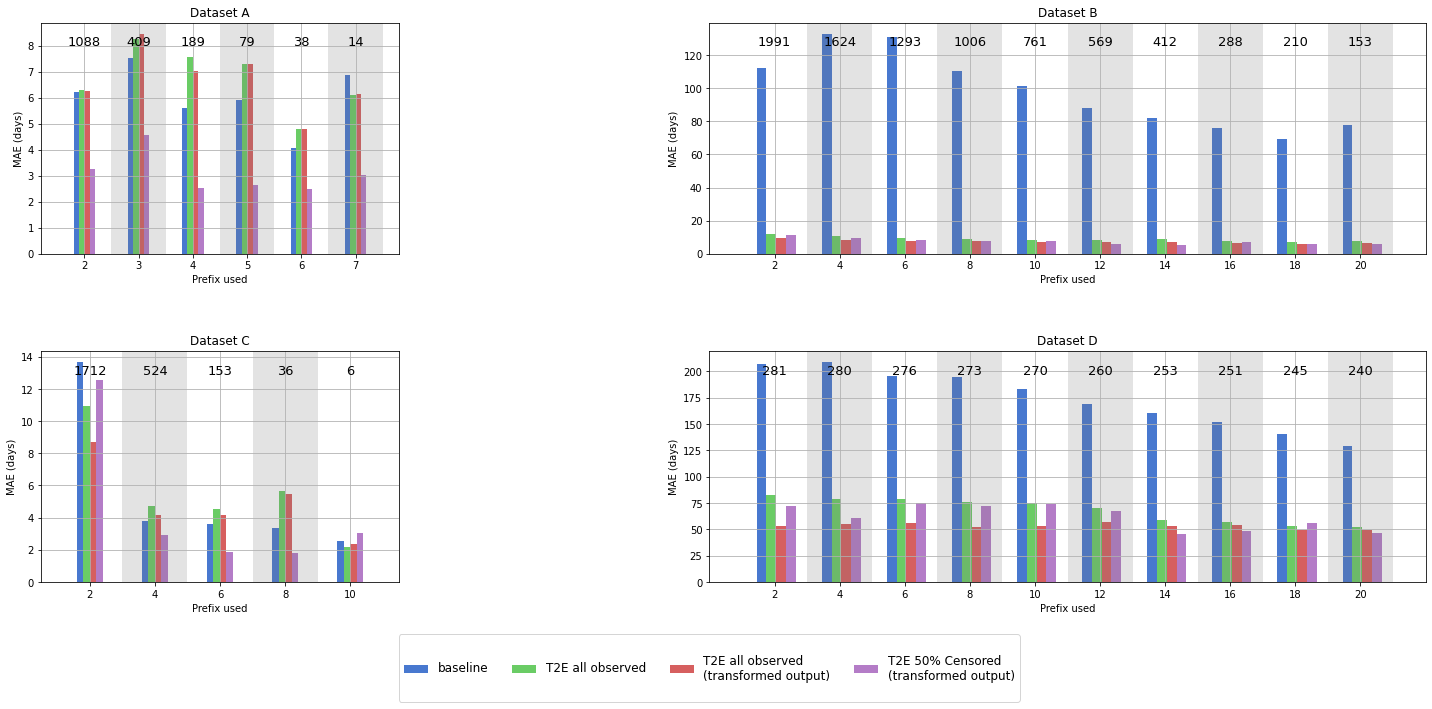

In [7]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 10)) 
gs = gridspec.GridSpec(2, 2, width_ratios=[1,2])
p = 0
for dataset in ['a','b','c','d']:
    cases = []
    labels= []

    ## Load baseline:
    path = 'output/maes/baseline/00/'
#     baseline_reduced  = pickle.load(open(path + dataset +'_reduced.pkl', 'rb'))
    baseline_complete = pickle.load(open(path + dataset +'_complete.pkl', 'rb'))
    cases.append(baseline_complete)
    labels.append("\nbaseline\n")
    
    
    ## Load grid search results complete
    path = 'output/maes/t2e/0/'
    grid_results_t2e_complete = list(np.squeeze(pickle.load(open(path + 't2e_'+dataset+'_GRU.pkl', 'rb')).groupby(["prefix"]).agg({"MAE":"min"}).values))
    cases.append(grid_results_t2e_complete)
    labels.append("\nT2E all observed\n")

    path = 'output/maes/t2e_transform/0/'
    grid_results_t2e_transform = list(np.squeeze(pickle.load(open(path + 't2e_'+dataset+'_GRU.pkl', 'rb')).groupby(["prefix"]).agg({"MAE":"min"}).values))
    cases.append(grid_results_t2e_transform)
    labels.append("\nT2E all observed\n(transformed output)\n")

    
    ## Load grid search results censored transform
    path = 'output/maes/t2e_transform/50/'
    grid_results_t2e_censored_trans = list(np.squeeze(pickle.load(open(path + 't2e_'+dataset+'_GRU.pkl', 'rb')).groupby(["prefix"]).agg({"MAE":"min"}).values))
    cases.append(grid_results_t2e_censored_trans)
    labels.append("\nT2E 50% Censored\n(transformed output)\n")   
    
    
    ax = plt.subplot(gs[p])
    X = np.array(range_dict[dataset])
    for j,case in enumerate(cases):
        
        if dataset in ['a']:
            steps = [-0.15, -0.05, 0.05, 0.15]
            width = 0.1
        elif dataset in ['c']:
            steps = [-0.3,-0.1, 0.1, 0.3]
            width =0.2
        else:
            steps = [-0.4,-0.1, 0.2, 0.5]
            width=0.3
            
        ax.bar(
            x      = X + steps[j], 
            height = case,
            width  = width,
            label  = labels[j]
        );
    path = 'output/maes/t2e/0/'
    text_counts = pickle.load(open(path + 't2e_'+dataset+'_GRU.pkl', 'rb'))\
                                .sort_values(['prefix','MAE'])\
                                .drop_duplicates(subset=['prefix'], keep='first')\
                                .reset_index(drop=True)\
                                ["test_size"]\
                                .values
    
    
    
    for i, span in enumerate(X):
        if dataset == 'a':
            ax.axvspan(span-0.5, span+0.5, facecolor='#767676', alpha=(i%2)*0.2)
        else:
            ax.axvspan(span-1, span+1, facecolor='#767676', alpha=(i%2)*0.2)
        ax.text(span,ax.get_ylim()[1]-10*ax.get_ylim()[1]/100,'{:1.0f}'.format(text_counts[i]),ha="center", fontsize=13);

        # Shrink current axis by 20%
#     box = ax.get_position()
#     ax.set_position([box.x0, 
#                      box.y0 - box.height * 0.1,
#                      box.width, 
#                      box.height * 0.9])                   
    # Put a legend to the bottom of the current axis
#     if p == 3:
#         ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.13) , ncol=4, frameon = True, fancybox =True, shadow = False, framealpha=0.8,fontsize=10)
    ax.set_xticks(range_dict[dataset])
    ax.set_xlabel("Prefix used")
    ax.set_ylabel("MAE (days)")
    ax.set_title("Dataset " + dataset.upper())
    ax.grid()
    p+=1


ax.legend(loc='upper center', bbox_to_anchor=(0.0, -0.2) , ncol=4, frameon = True, fancybox =True, shadow = False, framealpha=0.8,fontsize=12)
# plt.subplots_adjust(right=0.85)

plt.style.use('seaborn-deep')
gs.tight_layout(fig,h_pad=5, w_pad=0)
plt.show()